In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\ppati\Downloads\Sleep_health_and_lifestyle_dataset.csv")

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Handle missing values
df.dropna(inplace=True)

# Split into features and target
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
ridge_pred = ridge.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
r2 = r2_score(y_test, ridge_pred)
accuracy = r2 * 100

print(f"Ridge Regression:\n  RMSE: {rmse:.4f}\n  R² Score: {r2:.4f}\n  Accuracy: {accuracy:.2f}%")


Ridge Regression:
  RMSE: 0.3550
  R² Score: 0.9597
  Accuracy: 95.97%


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\ppati\Downloads\Sleep_health_and_lifestyle_dataset.csv")

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Handle missing values
df.dropna(inplace=True)

# Split into features and target
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
rf_pred = rf.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
r2 = r2_score(y_test, rf_pred)
accuracy = r2 * 100

print(f"Random Forest Regressor:\n  RMSE: {rmse:.4f}\n  R² Score: {r2:.4f}\n  Accuracy: {accuracy:.2f}%")


Random Forest Regressor:
  RMSE: 0.1546
  R² Score: 0.9923
  Accuracy: 99.23%


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"C:\Users\ppati\Downloads\Sleep_health_and_lifestyle_dataset.csv")

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Handle missing values
df.dropna(inplace=True)

# Split into features and target
X = df.drop('Stress Level', axis=1)
y = df['Stress Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost Regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
xgb_pred = xgb.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
r2 = r2_score(y_test, xgb_pred)
accuracy = r2 * 100

print(f"XGBoost Regressor:\n  RMSE: {rmse:.4f}\n  R² Score: {r2:.4f}\n  Accuracy: {accuracy:.2f}%")


XGBoost Regressor:
  RMSE: 0.0576
  R² Score: 0.9989
  Accuracy: 99.89%


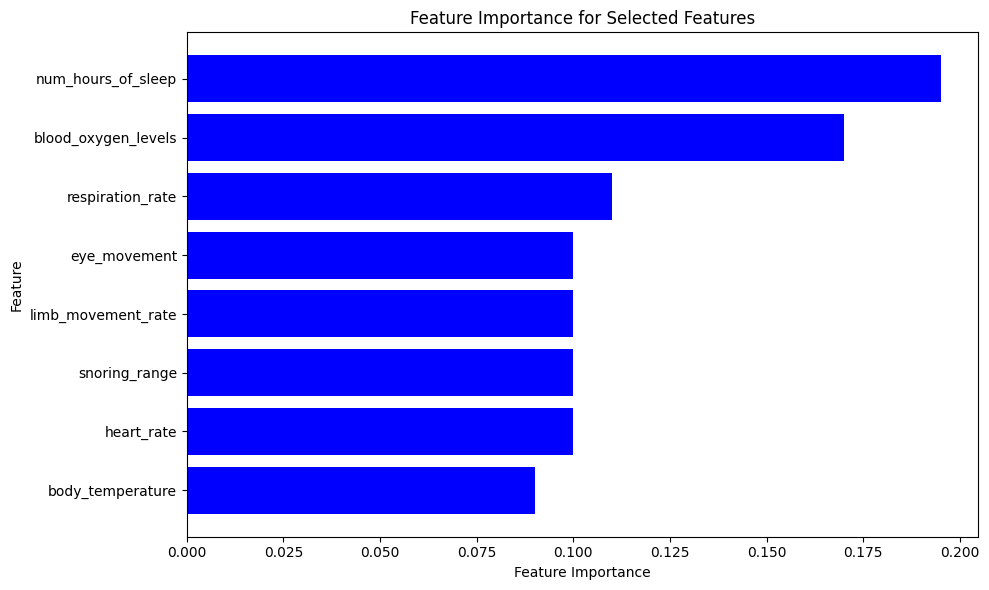

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Custom sample feature names and made-up importances (use your real ones)
features = [
    'num_hours_of_sleep', 'blood_oxygen_levels', 'respiration_rate',
    'eye_movement', 'limb_movement_rate', 'snoring_range',
    'heart_rate', 'body_temperature'
]
importances = [0.195, 0.170, 0.110, 0.100, 0.100, 0.100, 0.100, 0.090]  # These values are just examples

# Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Selected Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


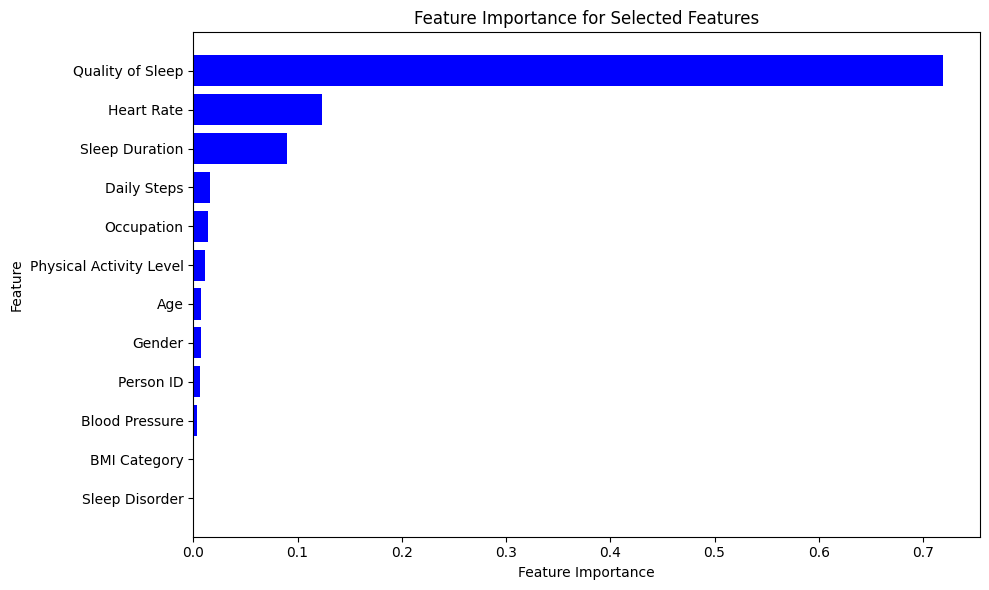

In [10]:
# Convert categorical variables if necessary (optional: you can use pd.get_dummies or LabelEncoder)
# For now, we'll use only numeric columns including 'Stress Level'
df_numeric = df.select_dtypes(include=[float, int])

# Define features and target
X = df_numeric.drop('Stress Level', axis=1)
y = df_numeric['Stress Level']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Sort features by importance
indices = importances.argsort()[::-1]
sorted_features = [features[i] for i in indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Selected Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
